<center> <h1>Case Study Data Science Master, Module 2: Analyzing Formula 1 Data </h1> </center>

<div style='float: right;'>
    <br/>
    <a href='src=https://storage.googleapis.com/wtf1-com.appspot.com/1/F1-New-Logo-2017-Abu-Dhabi-GP.jpg' target='_blank'>
    <img style="float: center;" src=https://storage.googleapis.com/wtf1-com.appspot.com/1/F1-New-Logo-2017-Abu-Dhabi-GP.jpg /
          width="300" height="0">
    <br/>
    </a>
</div>

<left> <h3> Professor:               Prof. Dr. Gottfried Vossen </h3> </left>
<left> <h3> Student:                 Ahmed Tantawy </h3> </left>
<left> <h3> Submission date:         28 Mars, 2022 </h3> </left>


## Solution Methodology

The solution is divided into points. 

Each point is corresponding to the case study module 2 requirements.

the dataset is already cashed to memory and also could be regenerated during validation by changing the cashing path.


## Table of Contents:

1. [Enable the cache](#enable)
2. [Setup plotting](#setup)
3. [Load the data and get the laps](#load)
4. [Study the data to get an understanding of it](#study)
5. [Select the specific data you are interested in (e.g., Hamilton, Verstappen, fastest lap,
etc.)](#select)
6. [Construct a single DataFrame called telemetry](#construct)
7. [Break the length of the lap into minisectors of equal size and create a list of all
distances at which the next minisector starts](#break)
8. [Assign a minisector to every row in the dataset and answer the question “in which
minisector was the car at the moment the datapoint was recorded?”](#assign)
9. [Calculate the fastest driver per minisector: calculate the average speed per driver per
minisector, select the driver with the highest average speed, and join the fastest driver per minisector with the telemetry data](#calculate)
**Finally:** [plot showing who, Hamilton or Verstappen, was faster in which minisector](#plot)


# 1. Enable the cache <a class="anchor" id="basic"/>

In [605]:
# we first need to install the package , if it is not installed

import pip
pip.main(['install','fastf1'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [606]:
import fastf1 as ff1
from fastf1.core import Laps
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

In [607]:
# by the following step we would not need to load the data set in the normal way like csv files or json , rather 
#than that we will cash the required data to the memory from fastf1 directly ...


In [608]:
# the next command to get the cashing path

!pip cache dir

/Users/ahmedtantawy/Library/Caches/pip


In [609]:
# here we will enable the cashing to take the required data in memory for further analysis in an efficient way

# we should use Path to the directory which should be used to store cached data. Path needs to exist.

# for the validation it will be different path..  


ff1.Cache.enable_cache('/Users/ahmedtantawy/Library/Caches/pip/')

# 2. Setup plotting <a class="anchor" id="setup"/>

In [610]:
# the plotting library of fastf1 is mainly built on top of matplotlib  but moreover well customized to meet the
# f1 data typical usage to take perfect advantage of it..

In [611]:
from fastf1 import plotting

plotting.setup_mpl()

# 3. Load the data and get the laps <a class="anchor" id="load"/>

In [612]:
# as per documentation get_session() is used to load the required season by inserting the year ,
#type of competition (qualifying or race ) and the location 
session = ff1.get_session(2021,'Abu Dhabi','R')

In [613]:
# we should insert the argument with_telemetry to true so, we can capture the telemetry(positining data 
#and car metering data) for further analysis

laps = session.load_laps(with_telemetry = True)

Loading laps for Abu Dhabi Grand Prix - Race [v2.1.13]
Using cached data for timing_data
Using cached data for timing_app_data
Processing timing data...
Using cached data for driver_info
Using cached data for session_status_data
Using cached data for track_status_data
Using cached data for car_data
Using cached data for position_data
Using cached data for weather_data
Loaded data for 19 drivers: ['14', '99', '16', '33', '44', '10', '5', '55', '77', '6', '31', '63', '47', '18', '7', '22', '4', '3', '11']


# 4. Study the data to get an understanding of it <a class="anchor" id="study"/>

In [614]:
#from Documentation get_session() has many parameters like year 
# to make sure that we are using the right session.
session.name

'Race'

In [615]:
# to get the results (winners , teams , natoinalities and etc ..)

session.results

[{'number': '33',
  'position': '1',
  'positionText': '1',
  'points': '26',
  'Driver': {'driverId': 'max_verstappen',
   'permanentNumber': '33',
   'code': 'VER',
   'url': 'http://en.wikipedia.org/wiki/Max_Verstappen',
   'givenName': 'Max',
   'familyName': 'Verstappen',
   'dateOfBirth': '1997-09-30',
   'nationality': 'Dutch'},
  'Constructor': {'constructorId': 'red_bull',
   'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing',
   'name': 'Red Bull',
   'nationality': 'Austrian'},
  'grid': '1',
  'laps': '58',
  'status': 'Finished',
  'Time': {'millis': '5417345', 'time': '1:30:17.345'},
  'FastestLap': {'rank': '1',
   'lap': '39',
   'Time': {'time': '1:26.103'},
   'AverageSpeed': {'units': 'kph', 'speed': '220.800'}}},
 {'number': '44',
  'position': '2',
  'positionText': '2',
  'points': '18',
  'Driver': {'driverId': 'hamilton',
   'permanentNumber': '44',
   'code': 'HAM',
   'url': 'http://en.wikipedia.org/wiki/Lewis_Hamilton',
   'givenName': 'Lewis',
   'familyN

In [616]:
# session object could be asked to give us the weather data..

weather_data = session.laps.get_weather_data()

In [617]:
# weather_data is also based on top of pandas dataframe

weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
63,0 days 01:03:04.027000,24.6,58.0,1017.6,True,28.4,276,0.4
64,0 days 01:04:04.026000,24.6,58.0,1017.6,True,28.4,276,0.4
66,0 days 01:06:04.030000,24.6,57.6,1017.7,True,28.7,308,0.3
67,0 days 01:07:04.044000,24.6,57.5,1017.8,True,28.4,286,0.6
69,0 days 01:09:04.041000,24.5,58.3,1017.7,True,28.4,331,0.5


In [618]:
# the next command to get info about lap object laps.info()
# it is lab object but in the background it is normal pandas dataframe plus some additional features for formula1 data
# it is the power of inheritance!!


# the most important data object to solve our challenge is the laps 
# it conatains as follows from .info() command the following columns in the output
# here is the meaning of some columns 
# Time : Session time when the lap time was set (end of lap)
# Driver (string): Three letter driver identifier
#LapTime : Recorded lap time.
#LapNumber : Recorded lap number
#LapStartTime : Session time at the start of the lap
#IsAccurate (bool): If True, the lap has passed a basic accuracy check for timing data. 
#PitOutTime (pandas.Timedelta): Session time when car exited the pit
#PitInTime (pandas.Timedelta): Session time when car entered the pit
#Sector1Time (pandas.Timedelta): Sector 1 recorded time    same as Sector2Time ,Sector3Time
#the remaining are explanined in the documentation (https://theoehrly.github.io/Fast-F1/core.html#fastf1.core.Laps# )

laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                998 non-null    timedelta64[ns]
 1   DriverNumber        998 non-null    object         
 2   LapTime             969 non-null    timedelta64[ns]
 3   LapNumber           998 non-null    int64          
 4   Stint               998 non-null    int64          
 5   PitOutTime          48 non-null     timedelta64[ns]
 6   PitInTime           32 non-null     timedelta64[ns]
 7   Sector1Time         978 non-null    timedelta64[ns]
 8   Sector2Time         998 non-null    timedelta64[ns]
 9   Sector3Time         998 non-null    timedelta64[ns]
 10  Sector1SessionTime  978 non-null    timedelta64[ns]
 11  Sector2SessionTime  998 non-null    timedelta64[ns]
 12  Sector3SessionTime  998 non-null    timedelta64[ns]
 13  SpeedI1             809 non-null    float64   

# 5. Select the specific data you are interested in (e.g., Hamilton, Verstappen, fastest lap, etc.) <a class="anchor" id="select"/>

In [619]:
#so, we have all laps for teams and players

#but, we will focus on the fastest lap between Hamilton and Verstapen

In [620]:
# we can not make deep analysis in many laps at the same time 
# so, we will capture the fastest lap as a reference for us

ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

In [621]:
# according to the documentation ,alternatively,the telemetry data could be obtained from the following methods
   
# 1_ .get_pos_data()
# 2_ .get_car_data()

# 6. Construct a single DataFrame called telemetry <a class="anchor" id="construct"/>


In [622]:
# get_telemetry() method captures both positioning and car data
#add_distance() method capturing the covered distance at which all data are recorded

ver_tel = ver_lap.get_telemetry().add_distance()
ham_tel = ham_lap.get_telemetry().add_distance()

In [623]:
# adding column for the driver name 
ver_tel['Driver'] = 'Verstappen'
ham_tel['Driver'] = 'Hamilton'

In [624]:
# creating the telemetry DataFrame
telemetry = ver_tel.append(ham_tel)

In [625]:
telemetry.info()

<class 'fastf1.core.Telemetry'>
Int64Index: 1524 entries, 2 to 765
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   1524 non-null   datetime64[ns] 
 1   SessionTime            1524 non-null   timedelta64[ns]
 2   DriverAhead            1524 non-null   object         
 3   DistanceToDriverAhead  760 non-null    float64        
 4   Time                   1524 non-null   timedelta64[ns]
 5   RPM                    1524 non-null   int64          
 6   Speed                  1524 non-null   int64          
 7   nGear                  1524 non-null   int64          
 8   Throttle               1524 non-null   int64          
 9   Brake                  1524 non-null   int64          
 10  DRS                    1524 non-null   int64          
 11  Source                 1524 non-null   object         
 12  RelativeDistance       1524 non-null   float64        


In [626]:
telemetry.sample(10)

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
581,2021-12-12 14:07:19.926,0 days 02:06:19.916000,,NaN,0 days 00:01:05.771000,10629,263,7,10,100,0,car,0.804430,OnTrack,1715,-2614,-232,4199.790000,Hamilton
334,2021-12-12 14:06:51.842,0 days 02:05:51.832000,,NaN,0 days 00:00:37.687000,8126,215,8,0,100,0,pos,0.487344,OnTrack,-2075,1382,-234,2545.236944,Hamilton
293,2021-12-12 14:06:47.241,0 days 02:05:47.231000,,NaN,0 days 00:00:33.086000,10999,305,8,100,0,0,pos,0.414574,OnTrack,-783,4989,-213,2163.339722,Hamilton
109,2021-12-12 14:06:26.285,0 days 02:05:26.275000,,NaN,0 days 00:00:12.130000,10806,264,7,92,0,0,car,0.148374,OnTrack,2601,5624,-137,774.615556,Hamilton
135,2021-12-12 14:00:57.885,0 days 01:59:57.875000,44,1021.297778,0 days 00:00:14.972000,11336,281,7,100,0,0,car,0.190213,OnTrack,2318,7685,-161,992.546944,Verstappen
284,2021-12-12 14:06:46.142,0 days 02:05:46.132000,,NaN,0 days 00:00:31.987000,10877,301,8,100,0,0,pos,0.396803,OnTrack,-460,5879,-212,2070.636667,Hamilton
764,2021-12-12 14:07:40.761,0 days 02:06:40.751000,,NaN,0 days 00:01:26.606000,11093,229,5,100,0,0,pos,0.997958,OnTrack,529,2075,-239,5212.023056,Hamilton
538,2021-12-12 14:07:15.085,0 days 02:06:15.075000,,NaN,0 days 00:01:00.930000,11261,223,5,100,0,0,car,0.736996,OnTrack,4854,-3807,-222,3848.645000,Hamilton
261,2021-12-12 14:01:12.321,0 days 02:00:12.311000,44,928.595278,0 days 00:00:29.408000,11410,283,7,100,0,0,pos,0.359203,OnTrack,215,7741,-213,1875.081944,Verstappen
728,2021-12-12 14:07:36.725,0 days 02:06:36.715000,,NaN,0 days 00:01:22.570000,7917,131,4,0,100,0,car,0.962294,OnTrack,-1100,1647,-221,5027.863889,Hamilton


In [627]:
telemetry.tail(5)

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
761,2021-12-12 14:07:40.446,0 days 02:06:40.436000,,NaN,0 days 00:01:26.291000,11752,219,5,100,0,0,car,0.994141,OnTrack,324,2052,-237,5192.224444,Hamilton
762,2021-12-12 14:07:40.541,0 days 02:06:40.531000,,NaN,0 days 00:01:26.386000,11485,223,5,100,0,0,pos,0.995277,OnTrack,385,2057,-238,5198.109167,Hamilton
763,2021-12-12 14:07:40.686,0 days 02:06:40.676000,,NaN,0 days 00:01:26.531000,11218,227,5,100,0,0,car,0.997039,OnTrack,479,2068,-238,5207.252222,Hamilton
764,2021-12-12 14:07:40.761,0 days 02:06:40.751000,,NaN,0 days 00:01:26.606000,11093,229,5,100,0,0,pos,0.997958,OnTrack,529,2075,-239,5212.023056,Hamilton
765,2021-12-12 14:07:40.770,0 days 02:06:40.760000,,NaN,0 days 00:01:26.615000,11031,230,5,100,0,0,interpolation,0.998069,OnTrack,534,2075,-239,5212.598056,Hamilton


In [628]:
# as shown in the previous output that telemetry object contains snapshots during the fastest lap for both drivers 
# like the x,y,z coordinates at this time , the traveled distance , gear_shift ,rpm and the Time

# 7. Break the length of the lap into minisectors of equal size and create a list of all distances at which the next minisector starts <a class="anchor" id="break"/>



In [629]:
# capturing  the distance that we will split afterwards to minisectros by getting the 
#max distance in the telemetry dataframe (in meters)
reference_distance =  max(telemetry['Distance'])

In [630]:
reference_distance

5212.598055555561

In [631]:
# defining number of mini_sectors as the unit for analysis our data
# number of mini_sectors could changed as we like..
minisectors = 100

In [632]:
# definition of unit length (minisector length)
single_minisector = reference_distance / minisectors

In [633]:
# each entry in the list_of_minisectors indicating the starting distance 
list_of_minisectors = [0]


for i in range(0, (minisectors )):
    
    list_of_minisectors.append(single_minisector * (i + 1))

In [634]:
list_of_minisectors

[0,
 52.12598055555561,
 104.25196111111121,
 156.37794166666683,
 208.50392222222243,
 260.62990277777806,
 312.75588333333366,
 364.88186388888926,
 417.00784444444486,
 469.13382500000046,
 521.2598055555561,
 573.3857861111117,
 625.5117666666673,
 677.6377472222229,
 729.7637277777785,
 781.889708333334,
 834.0156888888897,
 886.1416694444454,
 938.2676500000009,
 990.3936305555566,
 1042.5196111111122,
 1094.6455916666678,
 1146.7715722222233,
 1198.8975527777789,
 1251.0235333333346,
 1303.1495138888902,
 1355.2754944444457,
 1407.4014750000015,
 1459.527455555557,
 1511.6534361111126,
 1563.779416666668,
 1615.9053972222239,
 1668.0313777777794,
 1720.157358333335,
 1772.2833388888907,
 1824.4093194444463,
 1876.5353000000018,
 1928.6612805555574,
 1980.7872611111131,
 2032.9132416666687,
 2085.0392222222245,
 2137.16520277778,
 2189.2911833333355,
 2241.417163888891,
 2293.5431444444466,
 2345.669125000002,
 2397.7951055555577,
 2449.9210861111137,
 2502.0470666666693,
 2554.1

In [635]:
len(list_of_minisectors)

101

In [636]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda x: (
        int((x // single_minisector))
    )
)

# 8. Assign a minisector to every row in the dataset and answer the question “in which minisector was the car at the moment the datapoint was recorded? <a class="anchor" id="assign"/>



In [637]:
# to answer the question of which is faster per minisector , i will construct a new dataframe from pivoting the 
# the telemetry object as follow (the aggregation function is mean to get the winner in the whole period of the minisector)


both_drivers_speed = telemetry.pivot_table('Speed',
                                index='Minisector',
                                columns='Driver', aggfunc='mean')

In [638]:
both_drivers_speed

Driver,Hamilton,Verstappen
Minisector,,
0,237.285714,237.750000
1,253.285714,253.500000
2,265.285714,263.285714
3,275.333333,269.666667
4,279.200000,274.000000
...,...,...
95,188.125000,198.666667
96,132.384615,138.500000
97,139.583333,141.916667


# 9. Calculate the fastest driver per minisector: calculate the average speed per driver per minisector, select the driver with the highest average speed, and join the fastest driver per minisector with the telemetry data<a class="anchor" id="calculate"/>


In [639]:
both_drivers_speed['Winner'] = both_drivers_speed.idxmax(axis=1)

In [640]:
# dropping unwanted columns which are Hamilton and Verstipen

both_drivers_speed.drop('Verstappen' ,axis = 1, inplace=True)
both_drivers_speed.drop('Hamilton' ,axis = 1, inplace=True)
#both_drivers_speed.drop('max_value' ,axis = 1, inplace=True)

In [641]:
# the result as follows

both_drivers_speed

Driver,Winner
Minisector,
0,Verstappen
1,Verstappen
2,Hamilton
3,Hamilton
4,Hamilton
...,...
95,Verstappen
96,Verstappen
97,Verstappen


In [642]:
#joining the fastest driver per minisector with the telemetry data

telemetry = telemetry.merge(both_drivers_speed, on=['Minisector'])

In [643]:
telemetry.sample(10)

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,Winner
392,2021-12-12 14:06:35.841,0 days 02:05:35.831000,,NaN,0 days 00:00:21.686000,6455,108,4,0,50,...,pos,0.272570,OnTrack,1829,11774,-205,1425.501667,Hamilton,27,Hamilton
544,2021-12-12 14:01:13.641,0 days 02:00:13.631000,44,903.040556,0 days 00:00:30.728000,10682,293,8,100,0,...,pos,0.379516,OnTrack,-145,6746,-212,1980.928611,Verstappen,38,Hamilton
200,2021-12-12 14:06:25.125,0 days 02:05:25.115000,,NaN,0 days 00:00:10.970000,10703,252,7,100,0,...,car,0.132266,OnTrack,3358,5282,-159,690.859444,Hamilton,13,Verstappen
804,2021-12-12 14:06:59.725,0 days 02:05:59.715000,,NaN,0 days 00:00:45.570000,11056,192,5,100,0,...,car,0.535874,OnTrack,-1231,-525,-209,2798.590000,Hamilton,53,Hamilton
98,2021-12-12 14:00:48.641,0 days 01:59:48.631000,44,1050.320833,0 days 00:00:05.728000,9715,165,4,1,50,...,pos,0.074480,OnTrack,4325,2738,-231,390.493889,Verstappen,7,Verstappen
1406,2021-12-12 14:07:33.961,0 days 02:06:33.951000,,NaN,0 days 00:01:19.806000,11455,243,6,100,0,...,pos,0.933478,OnTrack,-611,259,-219,4874.668056,Hamilton,93,Verstappen
604,2021-12-12 14:01:17.364,0 days 02:00:17.354000,44,874.170278,0 days 00:00:34.451000,11023,304,8,100,0,...,car,0.439178,OnTrack,-1213,3803,-217,2292.214444,Verstappen,43,Hamilton
209,2021-12-12 14:00:55.001,0 days 01:59:54.991000,44,1008.315972,0 days 00:00:12.088000,10788,265,7,100,0,...,pos,0.148533,OnTrack,2598,5627,-136,775.331111,Verstappen,14,Verstappen
1122,2021-12-12 14:07:17.502,0 days 02:06:17.492000,,NaN,0 days 00:01:03.347000,10992,269,7,100,0,...,pos,0.769322,OnTrack,3174,-3610,-232,4016.475833,Hamilton,77,Hamilton
534,2021-12-12 14:01:13.044,0 days 02:00:13.034000,44,912.439167,0 days 00:00:30.131000,10971,289,7,100,0,...,car,0.370262,OnTrack,18,7200,-213,1932.687500,Verstappen,37,Hamilton


In [644]:
telemetry.info()

<class 'fastf1.core.Telemetry'>
Int64Index: 1524 entries, 0 to 1523
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   1524 non-null   datetime64[ns] 
 1   SessionTime            1524 non-null   timedelta64[ns]
 2   DriverAhead            1524 non-null   object         
 3   DistanceToDriverAhead  760 non-null    float64        
 4   Time                   1524 non-null   timedelta64[ns]
 5   RPM                    1524 non-null   int64          
 6   Speed                  1524 non-null   int64          
 7   nGear                  1524 non-null   int64          
 8   Throttle               1524 non-null   int64          
 9   Brake                  1524 non-null   int64          
 10  DRS                    1524 non-null   int64          
 11  Source                 1524 non-null   object         
 12  RelativeDistance       1524 non-null   float64        

# Finally, plot showing who, Hamilton or Verstappen, was faster in which minisector<a class="anchor" id="plot"/>

In [645]:
# I used code shunks from the documentation website (https://theoehrly.github.io/Fast-F1/examples_gallery/plot_gear_shifts_on_track.html#sphx-glr-examples-gallery-plot-gear-shifts-on-track-py)
# and customize it to get the same plotting technique but according to our goal for visualzing winner for 
#each minisectors 

In [646]:
import numpy as np

In [647]:
# getting x, y positions of the cars for both drivers
# this gives the exact position for the car on the track 
# this will be used to plot the lap as it was on the track

x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

In [648]:
# reshaping the point (one row and two columns for every point)
points = np.array([x, y]).T.reshape(-1, 1, 2)

In [649]:
points.shape

(1524, 1, 2)

In [650]:
# linking pairs of points as segments 
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [651]:
# # of segments are the number of points minus 1 which is logical

segments.shape

(1523, 2, 2)

In [652]:

# I used code shunks from the documentation website (https://theoehrly.github.io/Fast-F1/examples_gallery/plot_gear_shifts_on_track.html#sphx-glr-examples-gallery-plot-gear-shifts-on-track-py)
# and customize it to get the same plotting technique but according to our goal for presenting winner for 
#each minisectors 
    

In [653]:
# converting winner to number for plotting preparation
telemetry.loc[telemetry['Winner'] == 'Verstappen', 'Fastest_driver_#'] = 1
telemetry.loc[telemetry['Winner'] == 'Hamilton', 'Fastest_driver_#'] = 2
fastest_driver = telemetry['Fastest_driver_#'].to_numpy().astype(float)

In [654]:
# defining the plot function

from matplotlib.collections import LineCollection
from matplotlib import cm

def plot_the_race(segments , fastest_driver):

# chosing the colors 
    cmap = cm.get_cmap('summer', 2)
# creating the lines out of segments 
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(fastest_driver)
    lc_comp.set_linewidth(20)
# adding the lines to the plot
    plt.rcParams['figure.figsize'] = [20, 10] 
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
# drawing a bar in the right to distinguish the two drivers 
    cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
    cbar.set_ticks(np.arange(2, 10))
    cbar.set_ticklabels(['Verstappen', 'Hamilton'])
    # saving the plot 
    plt.savefig("Abu_Dhabi_2021.png", dpi=300)  
    plt.show()
    
    
    

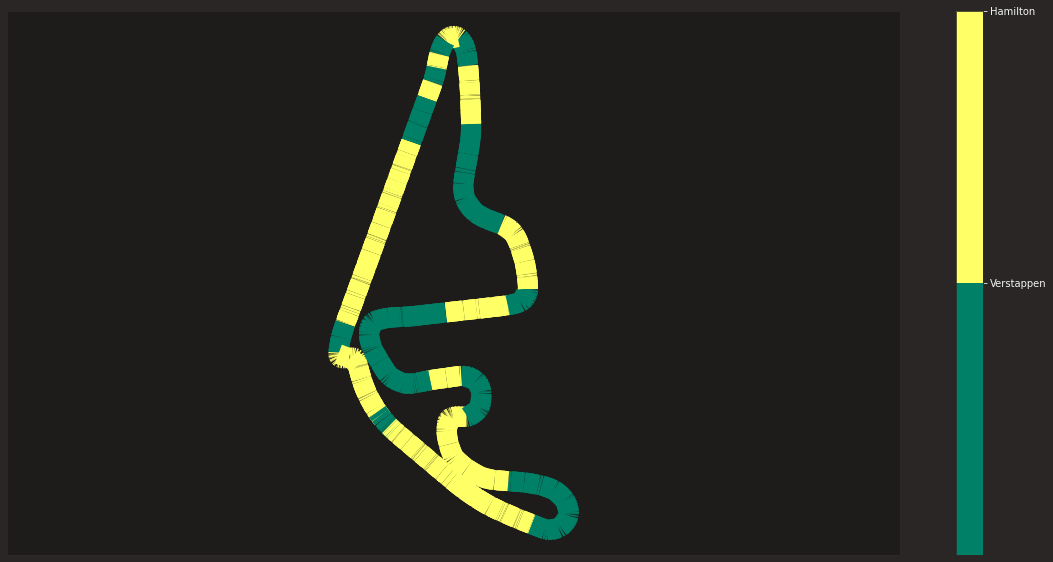

In [655]:
# applying the predefined plotting function with two inputs (start_to_end_point") and fastest driver



plot_the_race(segments , fastest_driver)

# End Of Case Study